# Compute performance metrics for the given Y and Y_score without sklearn

# udaylunawat@gmail.com

In [0]:
# !pip install -U ipykernel
# !pip install modin[dask]

In [0]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Appliedai colab/Assignment 5 - Compute performance metrics without sklearn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Appliedai colab/Assignment 5 - Compute performance metrics without sklearn


In [0]:
# Old and terribly slow code
# def perf_measure(y, y_pred):
#     TP = 0
#     FP = 0
#     TN = 0
#     FN = 0
#     for i in range(len(y_pred)): 
#         if y[i]==y_pred[i]==1.0:
#            TP += 1
#         elif y_pred[i]==1.0 and y[i]!=y_pred[i]:
#            FP += 1
#         elif y[i]==y_pred[i]==0:
#            TN += 1
#         elif y_pred[i]==0 and y[i]!=y_pred[i]:
#            FN += 1
#     return(TP, FP, TN, FN)

#Calculating TP, FP, TN, FN for confusion matrix
#Using np.sum and np.logical as it improves performance drastically
def perf_measure(y, y_pred):
    TP = np.sum(np.logical_and(y_pred == 1, y == 1))
    FP = np.sum(np.logical_and(y_pred == 1, y == 0))
    TN = np.sum(np.logical_and(y_pred == 0, y == 0))
    FN = np.sum(np.logical_and(y_pred == 0, y == 1))
    return TP,FP,TN,FN

#Inspired by -https://webcache.googleusercontent.com/search?q=cache:i-sKM7SjAKAJ:https://kawahara.ca/how-to-compute-truefalse-positives-and-truefalse-negatives-in-python-for-binary-classification-problems/+&cd=2&hl=en&ct=clnk&gl=in

neg_score = {} # For computing and storing A in Ques. c
def AUC(data):
    #Storing list of FPR and TPR used in a and b
    list_FPR = []
    list_TPR = []
    for i in tqdm_notebook(data['proba']): #Used tqdm to measure performance
        t = [0 if x<i else 1 for x in data['proba']] #Creating Taoo columns using thresholds one by one
        TP, FP, TN, FN = perf_measure(data['y'],np.array(t)) #Confusion matri values   
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        A = (500*FN) + (100*FP) #For Ques c
        neg_score.update({i:A}) #Dict with Taoo thresholds and their custom scores A as value
        list_FPR.append(FPR)
        list_TPR.append(TPR)
    AUC_sc = np.trapz(list_TPR,list_FPR) #Calculating AUC
    return AUC_sc, list_FPR, list_TPR

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [6]:
a = pd.read_csv('5_a.csv')
print("No. of positive points: ",a['y'].value_counts()[1])
print("No. of negative points: ",a['y'].value_counts()[0])
a.head()

No. of positive points:  10000
No. of negative points:  100


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


Highly unbalanced dataset, hence default AUC score can be invalidated

Confusion matrix and accuracy score

In [7]:
#Creating a y_pred column which uses 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1]
a['y_pred'] = [0 if x<0.5 else 1  for x in a['proba']]

#Computing and printing confusion matrix

TP, FP, TN, FN = perf_measure(np.array(a['y']),np.array(a['y_pred']))
x = np.array([[TN, FP,],
               [FN, TP]])
row_labels = ['Actual NO','Actual YES']
column_labels = ['Predicted NO','Predicted YES']
df = pd.DataFrame(x, columns=column_labels, index=row_labels)
print('Confusion matrix\n\n',df)
# print(df)
print('\nAccuracy =',(TP+TN)/len(a))

Confusion matrix

             Predicted NO  Predicted YES
Actual NO              0            100
Actual YES             0          10000

Accuracy = 0.9900990099009901


In [8]:
#calculating F1 score
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall) / (precision+recall)
print('F1 score',f1_score)

F1 score 0.9950248756218906


In [0]:
#Sorting dataframe a in descending order of proba
a.sort_values(by = 'proba',ascending=False, inplace = True)

In [10]:
AUC_score, FPR_list, TPR_list = AUC(a)

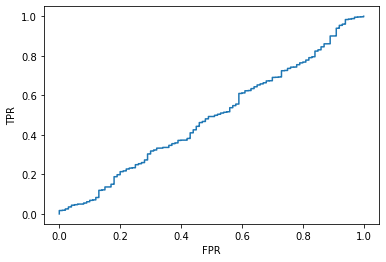

In [11]:
import matplotlib.pyplot as plt
plt.plot(FPR_list,TPR_list);
plt.xlabel("FPR");
plt.ylabel("TPR");

In [12]:
print("AUC_score of a : ",AUC_score)

AUC_score of a :  0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [13]:
b = pd.read_csv("5_b.csv")
print("No. of positive points: ",b['y'].value_counts()[1])
print("No. of negative points: ",b['y'].value_counts()[0])
#Creating a y_pred column which uses 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1]
b['y_pred'] = [0 if x<0.5 else 1 for x in b['proba']]
b.head()

No. of positive points:  100
No. of negative points:  10000


,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [31]:
#Computing and printing confusion matrix
TP, FP, TN, FN = perf_measure(np.array(b['y']),np.array(b['y_pred']))
x = np.array([[TN, FP,],
               [FN, TP]])
row_labels = ['Actual NO','Actual YES']
column_labels = ['Predicted NO','Predicted YES']
df = pd.DataFrame(x, columns=column_labels, index=row_labels)
print('\n\nConfusion matrix\n', df)
print('\nAccuracy =',(TP+TN)/len(b))



Confusion matrix
             Predicted NO  Predicted YES
Actual NO           9761            239
Actual YES            45             55

Accuracy = 0.9718811881188119


In [15]:
#calculating F1 score
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall) / (precision+recall)
print('F1 score',f1_score)

F1 score 0.2791878172588833


Pretty high AUC score, hence an excellent model.

In [0]:
#Sorting dataframe a in descending order of proba
b.sort_values(by = 'proba',ascending=False, inplace = True)

In [17]:
AUC_score, FPR_list, TPR_list = AUC(b)

In [18]:
b['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

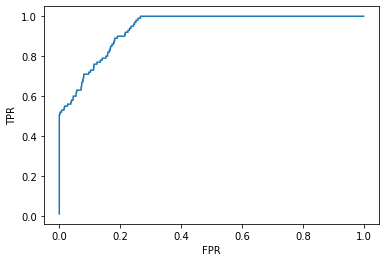

In [19]:
import matplotlib.pyplot as plt
plt.plot(FPR_list,TPR_list);
plt.xlabel("FPR");
plt.ylabel("TPR");

In [20]:
print("AUC_score of b : ",AUC_score)

AUC_score of b :  0.9377570000000001


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [21]:
c = pd.read_csv("5_c.csv")

#Renaming column prob to proba to match the already written function
c.rename({'prob':'proba'},inplace=True,axis = 1)
c.head()

,y,proba
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [22]:
print("No. of positive points: ",c['y'].value_counts()[0])
print("No. of negative points: ",c['y'].value_counts()[1])

No. of positive points:  1805
No. of negative points:  1047


In [23]:
#Computing and printing confusion matrix
c['y_pred'] = [0 if x<0.5 else 1 for x in c['proba']]
TP, FP, TN, FN = perf_measure(c['y'],c['y_pred'])
x = np.array([[TN, FP,],
               [FN, TP]])
row_labels = ['Actual NO','Actual YES']
column_labels = ['Predicted NO','Predicted YES']
df = pd.DataFrame(x, columns=column_labels, index=row_labels)
print('\n\nConfusion matrix\n', df)
print('\nAccuracy =',(TP+TN)/len(c))



Confusion matrix
             Predicted NO  Predicted YES
Actual NO           1637            168
Actual YES           462            585

Accuracy = 0.7791023842917251


Quite unbalanced dataset and we can see that the ratio of FP:FN is 1:5. Hence we're balancing it by calculating 

A =  500 * FP + 100 * FN 

So, we get out best threshold that minimizes A

In [0]:
#Sorting df by column proba
c.sort_values(by = 'proba',ascending=False, inplace = True)

In [25]:
#Generating FPR and TPR list, and calculating AUC score
#these are not important for this question but our function also generates a dictionary with the needed metric score
AUC_score, FPR_list, TPR_list = AUC(c)

In [26]:
s_c = sorted(neg_score.items(), key = lambda kv:(kv[1]),reverse = False)
print("Best threshold: {:.2f}".format(s_c[0][0]))

Best threshold: 0.50


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [27]:
d = pd.read_csv('5_d.csv')
d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [28]:
# the average squared difference between the estimated values and what is estimated
MSE = sum([(i-j)**2 for i,j in zip(d['y'],d['pred'])])/len(d)
print("Mean Sqaured Error :",MSE)

Mean Sqaured Error : 177.16569974554707


In [29]:
e = sum([abs(j-i) for i,j in zip(d['y'],d['pred'])])
mean_y = sum(d['y']) / len(d)
MAPE = (e/mean_y)/len(d)
print("MAPE :",MAPE)

MAPE : 0.1291202994009687


In [30]:
res_ss = sum([(i-j)**2 for i,j in zip(d['y'],d['pred'])])
tot_ss = sum([(i-mean_y)**2 for i in d['y']])
r2 = 1 - (res_ss / tot_ss)
print("R^2 error : ",r2)

R^2 error :  0.9563582786990964
